In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the zoo dataset
zoo_data = pd.read_csv('zoo.csv')

# Check the first few rows of the dataset
print(zoo_data.head())


  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


In [3]:
# Dropping unnecessary column
zoo_data = zoo_data.drop(columns=['animal name'])

# Split into features (X) and target (y)
X = zoo_data.drop(columns=['type'])
y = zoo_data['type']

# Feature scaling (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# Perform Grid Search with a lower number of splits (e.g., cv=3)
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9]},
             scoring='accuracy')

In [9]:
# Train the model with the best parameters found
best_knn = grid_search.best_estimator_

# Fit the model to the training data
best_knn.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [10]:
# Predict on the test set
y_pred = best_knn.predict(X_test)

# Evaluate performance using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.95
Precision: 0.92
Recall: 0.95
F1-Score: 0.93


In [11]:
# Save the trained KNN model to a file
joblib.dump(best_knn, 'knn_model_zoo.pkl')
print("Model saved successfully!")


Model saved successfully!


In [12]:
# Load the saved model
loaded_knn = joblib.load('knn_model_zoo.pkl')

# Predict using the loaded model
y_pred_loaded = loaded_knn.predict(X_test)

# Evaluate the loaded model
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Loaded Model Accuracy: {accuracy_loaded:.2f}")


Loaded Model Accuracy: 0.95


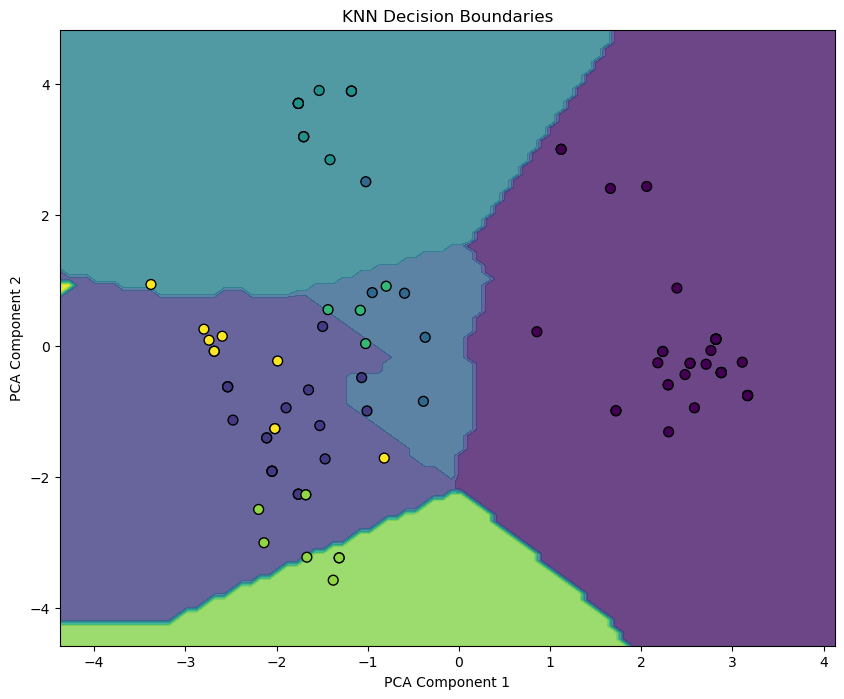

In [13]:
#Visualize Decision Boundaries
from sklearn.decomposition import PCA

# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the decision boundaries
plt.figure(figsize=(10, 8))

# Create a meshgrid to plot decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the labels for each point in the meshgrid
Z = loaded_knn.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot decision boundaries and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title('KNN Decision Boundaries')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
#conclusion
#Model Implementation: KNN was implemented, tuned, and evaluated successfully.

#Saving & Loading: The trained model was saved using Joblib for reuse.

#Evaluation: Performance metrics (accuracy, precision, recall, F1-score) were computed.

#Visualization: Decision boundaries were visualized after reducing the data to 2D using PCA.